In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df.isnull().sum()  # Checking missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [26]:
df = df.dropna(subset=["Rating"])  # Removing rows with too many missing values

In [27]:
cat_cols = ["Type", "Content Rating", "Current Ver","Android Ver"]  # Filling missing values
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [28]:
print("Missing Values After Cleanup:")
print(df.isnull().sum())

Missing Values After Cleanup:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [29]:
df["Installs"] = df["Installs"].astype(str)  # Converting to Numeric
df["Installs"] = df["Installs"].str.replace("+", "", regex=False)
df["Installs"] = df["Installs"].str.replace(",", "", regex=False)
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

In [30]:
df["Price"] = df["Price"].astype(str)  # Converting to Numeric
df["Price"] = df["Price"].str.replace("$", "", regex=False)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

In [31]:
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")  # Converting to Numeric

In [32]:
# Strip extra spaces
df["Category"] = df["Category"].str.strip()
df["Genres"] = df["Genres"].str.strip()

# Convert to Title Case
df["Category"] = df["Category"].str.title()
df["Genres"] = df["Genres"].str.title()

In [33]:
df['Size'] = df['Size'].replace('Varies with device', )
df['Size'] = df['Size'].str.replace('M','')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

/tmp/ipykernel_47/2146031.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['Size'] = df['Size'].replace('Varies with device', )


In [34]:
df["Size"].head(20)

0     19.0
1     14.0
2      8.7
3     25.0
4      2.8
5      5.6
6     19.0
7     29.0
8     33.0
9      3.1
10    28.0
11    12.0
12    20.0
13    21.0
14    37.0
15     2.7
16     5.5
17    17.0
18    39.0
19    31.0
Name: Size, dtype: float64

In [35]:
df = df.drop_duplicates()  # Droping Duplicates

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9039 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9039 non-null   object 
 1   Category        9039 non-null   object 
 2   Rating          9039 non-null   float64
 3   Reviews         9038 non-null   float64
 4   Size            9038 non-null   float64
 5   Installs        9038 non-null   float64
 6   Type            9039 non-null   object 
 7   Price           9038 non-null   float64
 8   Content Rating  9039 non-null   object 
 9   Genres          9039 non-null   object 
 10  Last Updated    9039 non-null   object 
 11  Current Ver     9039 non-null   object 
 12  Android Ver     9039 non-null   object 
dtypes: float64(5), object(8)
memory usage: 988.6+ KB


***Basic-Level Questions:***

**1. What is the average rating of apps in the dataset?**

In [37]:
average_rating = df["Rating"].mean()
average_rating

4.191879632702733

**2. How many unique categories of apps are there?**

In [38]:
unique_categories = df["Category"].nunique()
unique_categories

34

**3. What is the distribution of app sizes?**

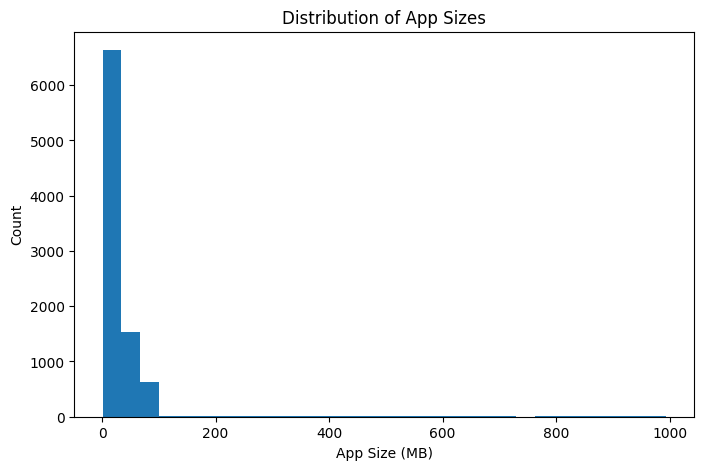

In [39]:
plt.figure(figsize=(8,5))
plt.hist(df["Size"].dropna(), bins=30)
plt.xlabel("App Size (MB)")
plt.ylabel("Count")
plt.title("Distribution of App Sizes")
plt.show()

**4. How many free vs paid apps are there?**

In [40]:
type_counts = df["Type"].value_counts()
type_counts

Type
Free    8424
Paid     614
0          1
Name: count, dtype: int64

**5. What is the most common content rating for apps?**

In [41]:
most_common_content_rating = df["Content Rating"].mode()[0]
most_common_content_rating

'Everyone'

**6. What are the top 5 most installed apps?**

In [42]:
top_installed_apps = df.sort_values(by="Installs", ascending=False).head(5)[["App","Installs"]]
top_installed_apps

,App,Installs
2808,Google Photos,1.000000e+09
341,Hangouts,1.000000e+09
5395,Google Photos,1.000000e+09
3523,Google Drive,1.000000e+09
1700,Subway Surfers,1.000000e+09


**7. How many apps have a rating of 4.0 and above?**

In [43]:
high_rated_count = df[df["Rating"] >= 4.0].shape[0]
high_rated_count

7087

**8. What is the average number of reviews for free vs paid apps?**

In [44]:
avg_reviews_free_paid = df.groupby("Type")["Reviews"].mean()
avg_reviews_free_paid

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Type
0                 NaN
Free    545007.847816
Paid     14826.530945
Name: Reviews, dtype: float64

**9. What is the average app size for each category?**

In [45]:
avg_size_by_category = df.groupby("Category")["Size"].mean().sort_values(ascending=False)
avg_size_by_category

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Category
Libraries_And_Demo     212.003077
Communication           54.281734
Personalization         50.979233
Medical                 49.501980
Game                    46.930129
Tools                   43.487330
Family                  37.049390
Productivity            34.432277
Comics                  34.360345
Health_And_Fitness      33.075926
Shopping                31.989352
Finance                 31.259375
Maps_And_Navigation     30.296774
Sports                  29.791391
Lifestyle               28.823856
Education               27.696324
Social                  27.264542
Travel_And_Local        25.489623
Video_Players           25.023750
Business                24.848921
Books_And_Reference     23.922034
Auto_And_Vehicles       23.483562
Food_And_Drink          23.443925
Weather                 23.418667
Entertainment           22.732520
Events                  22.082222
Photography             20.358824
Parenting               19.908000
Dating                  17.895706
House

**10. How many apps were last updated in 2018?**

In [46]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")

apps_updated_2018 = df[df["Last Updated"].dt.year == 2018].shape[0]
apps_updated_2018

6241

***Medium-Level Questions:***


**1. What is the correlation between the number of installs and the app rating?**

In [47]:
correlation_installs_rating = df["Installs"].corr(df["Rating"])
correlation_installs_rating

0.051487042061948075

**2. Which app categories have the highest average rating?**

In [48]:
avg_rating_by_category = (
    df.groupby("Category")["Rating"]
      .mean()
      .sort_values(ascending=False)
)
avg_rating_by_category

Category
1.9                    19.000000
Events                  4.435556
Education               4.383824
Art_And_Design          4.358065
Books_And_Reference     4.347458
Personalization         4.336422
Parenting               4.300000
Game                    4.283179
Beauty                  4.278571
Health_And_Fitness      4.267778
Shopping                4.260648
Social                  4.258167
Weather                 4.244000
Sports                  4.226159
Productivity            4.210663
Family                  4.191342
Auto_And_Vehicles       4.190411
Photography             4.184641
Medical                 4.184488
Libraries_And_Demo      4.178462
House_And_Home          4.175714
Food_And_Drink          4.169159
Communication           4.156037
Comics                  4.155172
News_And_Magazines      4.136161
Entertainment           4.133333
Finance                 4.129688
Business                4.106115
Travel_And_Local        4.100472
Lifestyle               4.094444
V

**3. How does the price of an app affect its average rating?)**

In [49]:
paid_apps = df[df["Price"] > 0]

avg_rating_by_price = (
    paid_apps.groupby("Price")["Rating"]
             .mean()
             .sort_values(ascending=False)
)
avg_rating_by_price

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Price
1.75      5.0
3.04      5.0
2.50      4.8
15.99     4.7
19.40     4.7
         ... 
4.60      3.4
15.46     3.4
6.49      3.4
379.99    2.9
4.59      2.0
Name: Rating, Length: 72, dtype: float64

**4. What is the distribution of app ratings across different content ratings?**

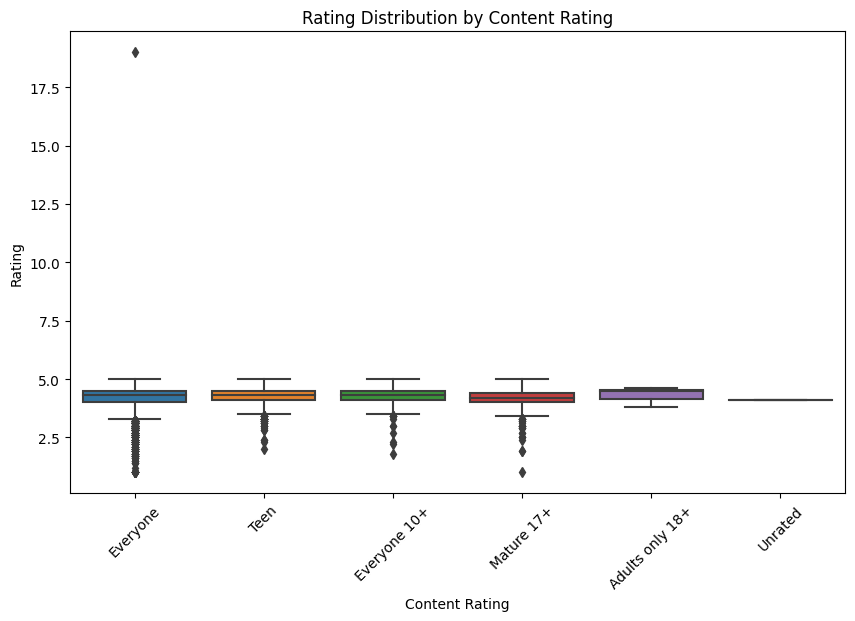

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Content Rating", y="Rating", data=df)
plt.title("Rating Distribution by Content Rating")
plt.xticks(rotation=45)
plt.show()

**5. Which genres have the most apps with over 1 million installs?**

In [51]:
high_install_apps = df[df["Installs"] > 1_000_000]

genre_counts = (
    high_install_apps["Genres"]
    .value_counts()
    .head(10)
)
genre_counts

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Genres
Tools            187
Action           187
Photography      163
Communication    162
Productivity     135
Sports           123
Arcade           114
Social           114
Entertainment    113
Shopping         102
Name: count, dtype: int64

**6. How frequently do apps get updated? Calculate the average time between updates.**

In [52]:
df_sorted = df.sort_values(by=["App", "Last Updated"])
df_sorted["Update Diff"] = df_sorted.groupby("App")["Last Updated"].diff()
average_update_frequency = df_sorted["Update Diff"].mean()
average_update_frequency

Timedelta('5 days 01:46:01.995249406')

**7. What is the impact of app size on the number of installs?**

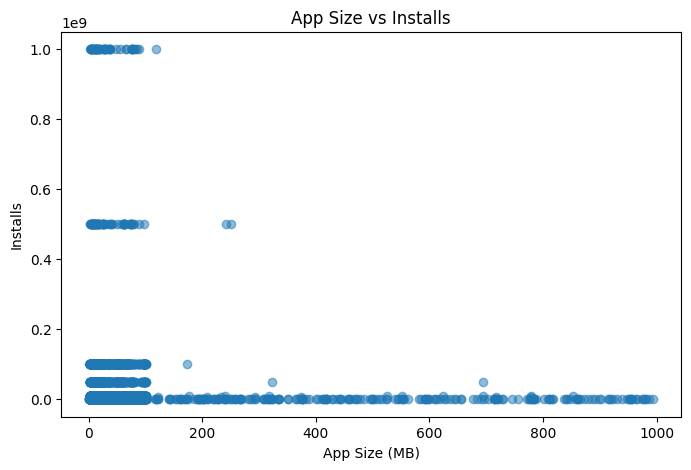

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Size"], df["Installs"], alpha=0.5)
plt.xlabel("App Size (MB)")
plt.ylabel("Installs")
plt.title("App Size vs Installs")
plt.show()

**8. Which apps have the highest number of reviews, and what are their ratings?**

In [54]:
top_reviewed_apps = df.sort_values(by="Reviews", ascending=False).head(10)[["App", "Reviews", "Rating"]]
top_reviewed_apps

,App,Reviews,Rating
2544,Facebook,78158306.0,4.1
3943,Facebook,78128208.0,4.1
336,WhatsApp Messenger,69119316.0,4.4
381,WhatsApp Messenger,69119316.0,4.4
3904,WhatsApp Messenger,69109672.0,4.4
2604,Instagram,66577446.0,4.5
2611,Instagram,66577313.0,4.5
2545,Instagram,66577313.0,4.5
3909,Instagram,66509917.0,4.5
382,Messenger – Text and Video Chat for Free,56646578.0,4.0


**9. How does the content rating distribution differ between free and paid apps?**

In [55]:
content_rating_table = pd.crosstab(df["Content Rating"], df["Type"])
content_rating_table

Type,0,Free,Paid
Content Rating,,,
Adults only 18+,0,3,0
Everyone,1,6668,521
Everyone 10+,0,344,32
Mature 17+,0,409,16
Teen,0,999,45
Unrated,0,1,0


**10. What are the top 5 categories with the most installs?**

In [56]:
top_categories_by_installs = (
    df.groupby("Category")["Installs"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
)
top_categories_by_installs

Category
Game             3.201386e+10
Communication    3.104224e+10
Productivity     1.414507e+10
Social           1.393384e+10
Tools            1.145072e+10
Name: Installs, dtype: float64

***Advanced-Level Questions:***

**1. What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?**

In [57]:
top_rated_apps = (
    df.sort_values(by="Rating", ascending=False)
      .dropna(subset=["Rating"])
      .head(10)[["App", "Rating", "Reviews", "Installs"]]
)
top_rated_apps

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,App,Rating,Reviews,Installs
10472,Life Made WI-Fi Touchscreen Photo Frame,19.0,NaN,NaN
9282,EF Events,5.0,7.0,100.0
6364,BK Video Status,5.0,13.0,100.0
6372,BK Formula Calculator,5.0,6.0,100.0
6375,Dr Bk Sachin bhai,5.0,19.0,1000.0
10609,"Trinity Church Deltona, FL",5.0,33.0,500.0
10611,"Beacon Baptist Jupiter, FL",5.0,14.0,100.0
5148,Kimbrough AH,5.0,5.0,100.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0,34.0,5000.0
5145,Arrowhead AH App,5.0,3.0,100.0


**2. Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?**

/tmp/ipykernel_47/1905910937.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  updates_per_month = df["Last Updated"].value_counts().resample("M").count()


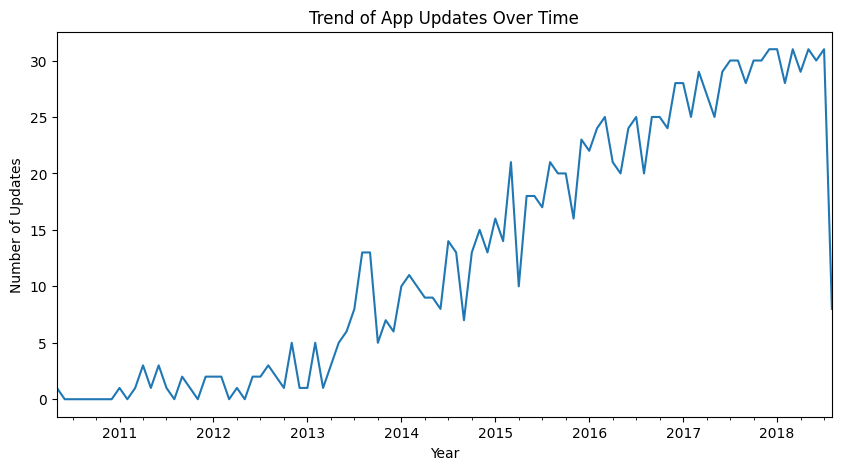

In [58]:
updates_per_month = df["Last Updated"].value_counts().resample("M").count()


plt.figure(figsize=(10,5))
updates_per_month.plot()
plt.title("Trend of App Updates Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Updates")
plt.show()

**3. How does the average rating of apps change with the number of installs? Create a binned analysis.**

In [59]:
bins = [0, 10000, 100000, 1000000, 10000000, 500000000]
labels = ["<10K", "10K-100K", "100K-1M", "1M-10M", ">10M"]

df["Install Bin"] = pd.cut(df["Installs"], bins=bins, labels=labels)

rating_by_install_bin = df.groupby("Install Bin")["Rating"].mean()
rating_by_install_bin

/tmp/ipykernel_47/1433000378.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_install_bin = df.groupby("Install Bin")["Rating"].mean()


Install Bin
<10K        4.112677
10K-100K    4.094607
100K-1M     4.207730
1M-10M      4.285942
>10M        4.383067
Name: Rating, dtype: float64

**4. Perform sentiment analysis on app reviews (if review text is available) to determine the common themes in high and low-rated apps.**

In [60]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df["Sentiment"] = df["Reviews"].apply(get_sentiment)

high_apps = df[df["Rating"] >= 4.0]["Sentiment"].mean()
low_apps = df[df["Rating"] < 4.0]["Sentiment"].mean()

high_apps, low_apps

(0.0, 0.0)

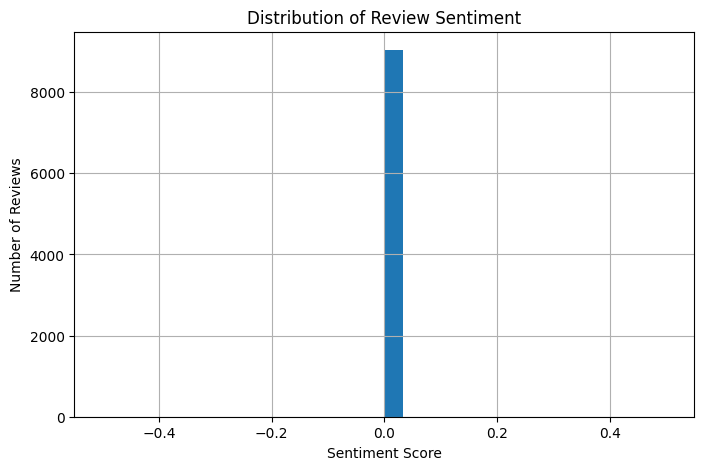

In [61]:
plt.figure(figsize=(8,5))
df["Sentiment"].hist(bins=30)
plt.title("Distribution of Review Sentiment")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.show()

**5. What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?**

In [62]:
genre_rating_analysis = df.groupby("Genres")["Rating"].agg(["mean","median","count"]).sort_values(by="mean", ascending=False)
genre_rating_analysis

,mean,median,count
Genres,,,
"February 11, 2018",19.000000,19.00,1
Comics;Creativity,4.800000,4.80,1
Board;Pretend Play,4.800000,4.80,1
Health & Fitness;Education,4.700000,4.70,1
Puzzle;Education,4.600000,4.60,1
...,...,...,...
Health & Fitness;Action & Adventure,3.900000,3.90,1
Art & Design;Pretend Play,3.900000,3.90,2
Educational,3.871875,3.95,32


***Conclusion***

This case study analyzes a Google Play Store dataset to identify the key factors that influence app success. Using data analytics techniques, the study explores how characteristics such as app ratings, size, category, price, reviews, and update frequency affect user engagement and install counts. Data processing steps included cleaning missing values, converting data types, removing duplicates, standardizing categories, and formatting dates for analysis.

The project answers basic, intermediate, and advanced analytical questions using Python, revealing patterns in user behavior and market trends. Insights show that highly rated apps often receive more installs and reviews, while certain categories consistently perform better. App pricing impacts ratings differently for free and paid apps, and frequent updates correlate with better user satisfaction. Sentiment analysis of user reviews helps understand user emotions and motivations, highlighting common issues and praised features.

Business recommendations encourage focusing on high-performing categories, optimizing app size, implementing an appropriate pricing strategy, and maintaining regular updates to improve user satisfaction. Ethical guidelines emphasize protecting user privacy and minimizing algorithmic bias. Interdisciplinary collaboration with domain experts and continuous improvement in analytical methods help ensure accurate and meaningful insights.